# Proyecto: Regresión lineal múltiple

## Modelo: $y = a_{0} + a_{1}x_{1} + a_{2}x_{2} + ... + a_{n}x_{n} $, donde

## $y$     <-- es el valor a predecir

## $x_{i}$ <-- son variables independientes

## $a_{i}$ <-- son los pesos que se encuentran en el entrenamiento

### * Cargamos datos usando pandas

### * Separamos datos para entrenamiento y pruebas mediante `train_test_split`

### * Usaremos la función `score` para evaluar precisión de las predicciones


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

# libreria que nos permite dividir los datos para entrenamiento y pruebas:
from sklearn.model_selection import train_test_split

# libreria para regresión lineal:
from sklearn.linear_model import LinearRegression

import numpy as np

In [2]:
# Cargamos base de datos:
dataset = pd.read_csv('./Datos/salarios2.csv')

In [3]:
# visualizamos los campos de los primeros 5 registros:
dataset.head(5)

,Aexperiencia,Escolaridad,Salario
0,10.0,3,80000
1,8.0,2,50000
2,5.4,3,55000
3,2.5,1,18103
4,1.0,1,15000


In [4]:
dataset.shape

(30, 3)

In [5]:
# Separamos datos de entrenamiento y prueba:

# las primeras dos columnas corresponden a los "features" (variables independientes):
nx = 2 #<-- numero de variables independientes 
x = dataset.iloc[:,0:nx].values 
x = x.reshape(x.shape[0],nx) # ponemos los datos en forma vertical

# la tercer columna la usaremos como "labels" (variable dependiente):
y = dataset.iloc[:,nx].values

# Separamos los datos:
p = 0.8 # <-- porcentaje de datos de entrenamiento
X_train , X_test , Y_train , Y_test = train_test_split(x, y, train_size = 0.8, random_state = 0 )
# random_state =0 <--- indica que cada vez que ejecutamos el modelo, dicho conjunto sea fijo

In [6]:
# Hacemos análisis de linealidad mediante la matriz de covarianzas:

# Matriz de covarianzas:
Mcov = dataset.cov()

Mcov

,Aexperiencia,Escolaridad,Salario
Aexperiencia,8.408379,1.276207,4.149501e+04
Escolaridad,1.276207,0.575862,1.217395e+04
Salario,41495.009655,12173.951724,3.555177e+08


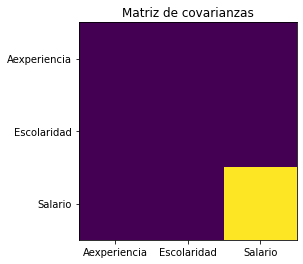

In [7]:
# Graficamos matriz de covarianzas:

c_names = dataset.columns

plt.imshow(Mcov)
plt.title('Matriz de covarianzas')
plt.yticks( range(Mcov.shape[0]), c_names)
plt.xticks( range(Mcov.shape[1]), c_names)
plt.show()

In [8]:
# Hacemos análisis de linealidad mediante la matriz de covarianzas:

# Seleccionamos 2 variables:
var_a = 'Escolaridad'
var_b = 'Salario'

# Extraemos la covarianza entre 2 variables:
Sxy = Mcov.loc[ var_a, var_b]

# Varianza en x:
Sxx = Mcov.loc[var_a, var_a]
# Desviación estándar en x:
Sx = np.sqrt(Sxx) 

# Varianza en y:
Syy = Mcov.loc[var_b, var_b]
# Desviación estándar en y:
Sy = np.sqrt(Syy)


# Coeficiente de correlación (puede tomar valores entre -1 y 1):
rxy = Sxy/(Sx*Sy)

if rxy < -0.8:
    print('rxy=',rxy,'las 2 variables:',var_a,var_b,', están negativamente correlacionadas')
elif rxy > 0.8:
    print('rxy=',rxy,'las 2 variables:',var_a,var_b,', están positivamente correlacionadas')
else:
    print('las 2 varibales:',var_a,var_b,', no estan correlacionadas')

rxy= 0.8508278472221034 las 2 variables: Escolaridad Salario , están positivamente correlacionadas


In [9]:
# Cargamos el método de entrenamiento:
model_regression = LinearRegression()

# Entrenamos el modelo:
model_regression.fit(X_train,Y_train)

LinearRegression()

In [10]:
# Aplicamos el aprendizaje a los datos de entrenamiento:
Y_pred_train = model_regression.predict(X_train)

# Aplicamos el aprendizaje a los datos de prueba:
Y_pred_test = model_regression.predict(X_test)

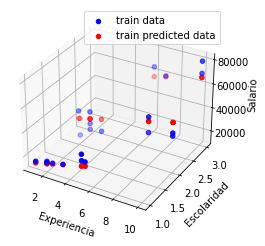

In [11]:
# Visualizamoe el entrenamiento:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], Y_train , marker='o' , color='blue' , label = 'train data')
ax.scatter(X_train[:,0], X_train[:,1], Y_pred_train , marker='o' , color='red', label = 'train predicted data')
ax.set_xlabel('Experiencia')
ax.set_ylabel('Escolaridad')
ax.set_zlabel('Salario')

ax.legend()

plt.show()

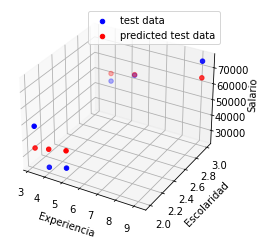

In [12]:
# Visualizamoe el aprendizaje:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[:,0], X_test[:,1], Y_test , marker='o' , color='blue' , label = 'test data')
ax.scatter(X_test[:,0], X_test[:,1], Y_pred_test , marker='o' , color='red' , label = 'predicted test data')
ax.set_xlabel('Experiencia')
ax.set_ylabel('Escolaridad')
ax.set_zlabel('Salario')

ax.legend()

plt.show()

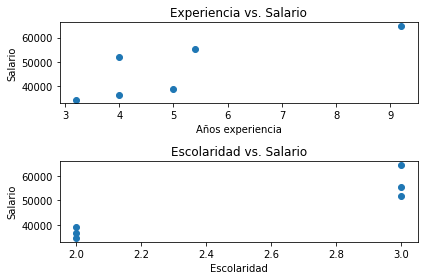

In [13]:
fig, axs = plt.subplots(2)
axs[0].scatter(X_test[:,0], Y_pred_test)
axs[0].set_title('Experiencia vs. Salario')
axs[0].set_xlabel('Años experiencia')
axs[0].set_ylabel('Salario')

axs[1].scatter(X_test[:,1], Y_pred_test)
axs[1].set_title('Escolaridad vs. Salario')
axs[1].set_xlabel('Escolaridad')
axs[1].set_ylabel('Salario')

fig.tight_layout() # <-- incrementa espacio entre subplots

In [14]:
# Aplicamos el 'model_regression' a un dato de prueba en particular:

j=5

print('Etiqueta real = ', Y_test[j])

Y_perd_j = model_regression.predict( [X_test[j]] ) 
print('\nEtiqueta predicha = ', Y_perd_j)

Etiqueta real =  75000

Etiqueta predicha =  [64701.86297031]


In [15]:
# Evaluamos la precisión de la predicción:
c = model_regression.score(X_test , Y_test)

print('El modelo puede predecir a un ',c*100,' % ')

El modelo puede predecir a un  66.1638951205268  % 
